<br>

# 글로브(GloVe)

<br>

## 글로브
* **글로브(Global Vectors for Word Representation, GloVe)는 카운트 기반과 예측 기반을 모두 사용하는 방법론**
* 기존의 카운트 기반의 LSA(Latent Semantic Analysis)와 예측 기반의 Word2Vec의 단점을 보완 (실제로도 Word2Vec만큼 뛰어난 성능)
* 현재까지의 연구에 따르면 단정적으로 Word2Vec와 GloVe 중에서 어떤 것이 더 뛰어나다고 말할 수는 없고, 이 두 가지 전부를 사용해보고 성능이 더 좋은 것을 사용하는 것이 바람직

<br>

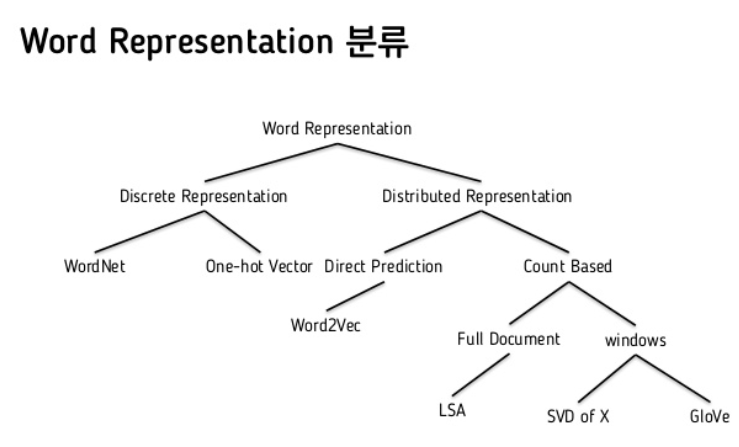

<br>

### 기존 방법론에 대한 비판
* **기존의 LSA는 DTM이나 TF-IDF 행렬과 같이 각 문서에서의 각 단어의 빈도수를 카운트 한 행렬이라는 전체적인 통계 정보를 입력으로 받아 차원을 축소(Truncated SVD)하여 잠재된 의미를 끌어내는 방법론** 
* 반면, **Word2Vec는 실제값과 예측값에 대한 오차를 손실 함수를 통해 줄여나가며 학습**하는 예측 기반의 방법론

<br>

**서로 다른 방법을 사용하는 이 두 방법론은 각각 장, 단점 존재**

<br>

* **LSA는 카운트 기반으로 코퍼스의 전체적인 통계 정보를 고려하기는 하지만,`왕:남자 = 여왕:? (정답은 여자)`와 같은 단어 의미의 유추 작업(Analogy task)에는 성능이 떨어짐**
  
* **Word2Vec는 예측 기반으로 단어 간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보를 반영하지 못함**
  
* **GloVe는 이러한 기존 방법론들의 각각의 한계를 지적하며, LSA의 메커니즘이었던 카운트 기반의 방법과 Word2Vec의 메커니즘이었던 예측 기반의 방법론 두 가지를 모두 사용**

<br>

### 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)

* 단어의 동시 등장 행렬은 행과 열을 전체 단어 집합의 단어들로 구성하고, 

  **i 단어의 윈도우 크기(Window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬**


```
I like deep learning
I like NLP
I enjoy flying
```

<br>

| Count | I | like | enjoy | deep | learning | NLP | flying |
| - | - | - | - | - | - | - | - |
|I	|0	|2	|1	|0	|0	|0	|0 |
| like |	2|	0|	0|	1|	0|	1|	0|
|enjoy|	1|	0|	0|	0|	0|	0|	1|
|deep	|0	|1	|0	|0	|1	|0	|0|
|learning	|0	|0	|0	|1	|0	|0	|0|
|NLP	|0	|1	|0	|0	|0	|0	|0|
|flying	|0	|0	|1	|0	|0	|0	|0|


<br>

* 위 행렬은 행렬을 전치(Transpose)해도 동일한 행렬
  * i 단어의 윈도우 크기 내에서 k 단어가 등장한 빈도는 반대로 k 단어의 윈도우 크기 내에서 i 단어가 등장한 빈도와 동일



<br>

### 동시 등장 확률(Co-occurrence Probability)
* **동시 등장 확률 $P(k\ |\ i)$ : 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률**

* $P(k\ |\ i)$에서 i를 중심 단어(Center Word), k를 주변 단어(Context Word)라고 했을 때, **동시 등장 행렬에서 중심 단어 i의 행의 모든 값을 더한 값을 분모**로 하고 **i행 k열의 값을 분자**

| 동시등장 확률 & 크기 관계 비(ratio) | k=solid | k=gas | k=water | k=fasion |
| - | ------|------|------|------| 
|P(k l ice) | 0.00019 | 0.000066 | 0.003 | 0.000017 | 
|P(k l steam) |0.000022 |0.00078 | 0.0022 | 0.000018 | 
|P(k l ice) / P(k l steam) | 8.9 | 0.085 | 1.36 | 0.96
 |

* ice가 등장했을 때 solid가 등장할 확률 0.00019은,

 steam이 등장했을 때 solid가 등장할 확률인 0.000022보다 **약 8.9배 높음**
 
* k가 solid일 때, $P(solid\;| \;ice) / P(solid\;|\; steam)$를 계산한 값은 8.9


* gas는 ice보다는 steam과 더 자주 등장하므로, $P(gas\; | \;ice) / P(gas\; | \;steam)$를 계산한 값은 1보다 훨씬 작은 값인 0.085
* 반면, k가 water인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 많으므로 1에 가까운 값이 나오고, k가 fasion인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 적으므로 1에 가까운 값

<br>

|동시 등장 확률과 크기 관계 비(ratio) | k=solid | k=gas | k=water | k=fasion | 
| - | ------|------|------|------| 
| P(k l ice) | 큰 값 | 작은 값 | 큰 값 | 작은 값 | 
| P(k l steam) | 작은 값 | 큰 값 | 큰 값 | 작은 값 | 
| P(k l ice) / P(k l steam) | 큰 값 | 작은 값 | 1에 가까움 | 1에 가까움 |


<br>

### Glove 임베딩 벡터들을 만들기 위한 손실 함수(Loss function)
* $X$ : 동시 등장 행렬(Co-occurrence Matrix)
* $X_{ij}$ : 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 j가 등장하는 횟수
* $X_{i} : \sum_j X_{ij}$ : 동시 등장 행렬에서 i행의 값을 모두 더한 값
* $P_{ik}$ : $P(k\ |\ i)$ = $ \frac{X_{ik}}{X_{i}}$ : 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 k가 등장할 확률

  Ex) $P(solid\;|\;ice)$ = 단어 ice가 등장했을 때 단어 solid가 등장할 확률
 
* $\frac{P_{ik}}{P_{jk}}$ : ${P_{ik}}$를 ${P_{jk}}$로 나눠준 값
  
  Ex) P(solid l ice) / P(solid l steam) = 8.9
* $w_{i}$: 중심 단어 i의 임베딩 벡터
* $\tilde{w_{k}}$: 주변 단어 k의 임베딩 벡터

<br>

#### Glove : 임베딩 된 중심 단어와 주변 단어 벡터의 내적이, 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것

$$dot\ product(w_{i}\ \tilde{w_{k}}) \approx\ P(k\ |\ i) = P_{ik}$$

$$dot\ product(w_{i}\ \tilde{w_{k}}) \approx\ log\ P(k\ |\ i) = log\ P_{ik}$$

<br>

* **Glove 임베딩 벡터들을 만들기 위한 손실 함수에서 가장 중요한 것은 단어 간의 관계를 잘 표현하는 함수여야 한다는 것**

  * GloVe의 연구진들은 벡터 $w_{i}, w_{j}, \tilde{w_{k}}$를 가지고 어떤 함수 $F$를 수행하면, $P_{ik} / P_{jk}$가 나온다는 초기 식으로부터 전개를 시작

$$F(w_{i},\ w_{j},\ \tilde{w_{k}}) = \frac{P_{ik}}{P_{jk}}$$

<br>

* **함수 $F$가 어떤 식을 가지고 있는지는 정해진 게 없으나. 함수 $F$는 두 단어 사이의 동시 등장 확률의 크기 관계 비(ratio) 정보를 벡터 공간에 인코딩하는 것이 목적**
* 이를 위해 GloVe 연구진들은 **$w_i$와 $w_j$라는 두 벡터의 차이**를 함수 $F$의 입력으로 사용하는 것을 제안

$$F(w_{i} -\ w_{j},\ \tilde{w_{k}}) = \frac{P_{ik}}{P_{jk}}$$

<br>

* **우변은 스칼라값, 좌변은 벡터값 $→$ 이가 성립하기 해주기 위해서 함수 $F$의 두 입력에 내적(Dot product)을 수행**

$$F((w_{i} -\ w_{j})^{T} \tilde{w_{k}}) = \frac{P_{ik}}{P_{jk}}$$

<br>

#### 즉, 선형 공간(Linear space)에서 단어의 의미 관계를 표현하기 위해 뺄셈과 내적을 활용

<br>

* 함수 $F$가 만족해야 할 필수 조건:
  * **중심 단어 $w$와 주변 단어 $\hat{w}$라는 선택 기준은 실제로는 무작위 선택이므로, 이 둘의 관계는 자유롭게 교환이 가능해야함**
  
    **$\rightarrow$ $F$가 실수의 덥셈과 양수의 곱셈에 대해서 준동형(Homomorphism)을 만족시킴**
  
    ($a$와 $b$에 대해서 함수 $F$가 $F(a+b)$가 $F(a)F(b)$와 같도록 만족)


$$F(a+b) = F(a)F(b),\ \forall a,\ b\in \mathbb{R}$$

* 이 준동형식을 현재 전개하던 GloVe 식에 적용할 수 있도록 변경 : 
 
 함수 $F$는 결과값으로 스칼라 값($\frac{P_{ik}}{P_{jk}}$)이 나와야 함. 
 
 준동형식에서 $a$와 $b$가 각각 벡터값이라면 함수 $F$의 결과값으로는 스칼라 값이 나올 수 없지만, **$a$와 $b$가 각각 사실 두 벡터의 내적값이라고 하면 결과값으로 스칼라 값이 나올 수 있음**
 
 준동형식을 아래와 같이 변경
 
 ($v_{1},\ v_{2},\ v_{3},\ v_{4}$는 각각 벡터값, $V$는 벡터)

$$F(v_{1}^{T}v_{2} + v_{3}^{T}v_{4}) = F(v_{1}^{T}v_{2})F(v_{3}^{T}v_{4}),\ \forall v_{1},\ v_{2},\ v_{3},\ v_{4}\in V$$

<br>

* 준동형 식을 GloVe 식에 적용 :

  1. 함수 $F$의 우변을 변경

  $$F((w_{i} -\ w_{j})^{T} \tilde{w_{k}}) = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$

  2. 우변은 본래 $\frac{P_{ik}}{P_{jk}}$였으므로,

  $$\frac{P_{ik}}{P_{jk}} = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$

  $$F(w_{i}^{T}\tilde{w_{k}}) = P_{ik} = \frac{X_{ik}}{X_{i}}$$

  3. 좌변을 풀어쓰면

  $$F(w_{i}^{T}\tilde{w_{k}}\ -\ w_{j}^{T}\tilde{w_{k}}) = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$

  4. 이는 뺄셈에 대한 준동형식의 형태와 정확히 일치
  
    이를 만족시키는 함수는 지수 함수 $exp$(Exponential function)

  $$exp(w_{i}^{T}\tilde{w_{k}}\ -\ w_{j}^{T}\tilde{w_{k}}) = \frac{exp(w_{i}^{T}\tilde{w_{k}})}{exp(w_{j}^{T}\tilde{w_{k}})}$$

  $$exp(w_{i}^{T}\tilde{w_{k}}) = P_{ik} = \frac{X_{ik}}{X_{i}}$$

  $$w_{i}^{T}\tilde{w_{k}} = log\ P_{ik} = log\ (\frac{X_{ik}}{X_{i}}) = log\ X_{ik} - log\ X_{i}$$

<br>

* **$w_i$와 $\tilde{w_{k}}$는 두 값의 위치를 서로 바꾸어도 식이 성립해야함.**
* **$X_{ik}$의 정의를 생각해보면 $X_{ki}$동일하지만, 이것이  성립되려면 위의 식에서 $log\ X_{i}$이 존재**
* **이 부분만 없다면 이를 성립시킬 수 있기에.GloVe 연구팀은 이 $log\ X_{i}$항을 $w_i$에 대한 편향 $b_i$라는 상수항으로 대체**
  
  같은 이유로 $\tilde{w_{k}}$에 대한 편향 $\tilde{b_{k}}$를 추가

$$w_{i}^{T}\tilde{w_{k}} + b_{i} + \tilde{b_{k}} = log\ X_{ik}$$

<br>

* **우변의 값과의 차이를 최소화는 방향으로 좌변의 4개의 항은 학습을 통해 값이 바뀌는 변수들이 됨**

  **즉, 손실 함수는 다음과 같이 일반화**

$$Loss\ function = \sum_{m, n=1}^{V}\ (w_{m}^{T}\tilde{w_{n}} + b_{m} + \tilde{b_{n}} - logX_{mn})^{2}$$

<br>

* $V$는 단어 집합의 크기를 의미
* **$log\ X_{ik}$에서 $X_{ik}$값이 0이 될 수 있기에, $log\ X_{ik}$항을 $log\ (1 + X_{ik})$로 변경**

* **동시 등장 행렬 $X$에는 많은 값이 0이거나, 동시 등장 빈도가 적어서 많은 값이 작은 수치를 가지는 경우가 많음 $→$ 동시 등장 행렬 $X$는 마치 DTM처럼 희소 행렬(Sparse Matrix)일 가능성 존재**
  * 또한, 동시 등장 행렬에서 동시 등장 빈도의 값 $X_{ik}$ 이 굉장히 낮은 경우에는 정보에 거의 도움이 되지 못함

#### **따라서 $X_{ik}$의 값에 영향을 받는 가중치 함수(Weighting function) $f(X_{ik})$를 손실 함수에 도입**

<br>

* GloVe에 도입되는 $f(X_{ik})$의 그래프

  ![가중치[1].PNG](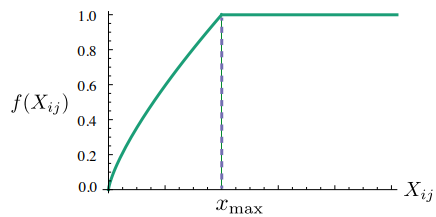)

* **$X_{ik}$  값이 작으면 상대적으로 함수의 값은 작도록 하고, 값이 크면 함수의 값은 상대적으로 크도록 설정**
  * 하지만 $X_{ik}$가 지나치게 높다고해서 지나친 가중치를 주지 않기위해서 또한 함수의 최대값은 사전에 정해짐 (최대값은 1) 
  
    `예를 들어 'It is'와 같은 불용어의 동시 등장 빈도수가 높다고해서 지나친 가중치를 받아서는 안됨`
  
    이 함수의 값을 손실 함수에 곱해주면 가중치의 역할
* 이 함수 $f(x)$의 식
$$f(x) = min(1,\ (x/x_{max})^{3/4})$$
* 최종적인 일반화 된 손실 함수

$$Loss\ function = \sum_{m, n=1}^{V}\ f(X_{mn})(w_{m}^{T}\tilde{w_{n}} + b_{m} + \tilde{b_{n}} - logX_{mn})^{2}$$

<br>

<br>

## 사전훈련된 Glove 모델

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

In [9]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [16]:
import nltk
nltk.download('punkt')

import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f18aa4eec50>)

In [3]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

parse_text = '\n'.join(target_text.xpath('//content/text()'))

content_text = re.sub(r'\([^)]*\)', '', parse_text)

sent_text = sent_tokenize(content_text)

normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

result = [word_tokenize(sentence) for sentence in normalized_text]

In [4]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(result)

In [17]:
def embedding_for_vocab(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
      
    embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))
  
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
  
    return embedding_matrix_vocab

In [19]:
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab('./glove.6B.50d.txt', tokenizer.word_index, embedding_dim)
  
print("Dense vector for first word is => ",embedding_matrix_vocab[1])

Dense vector for first word is =>  [ 4.18000013e-01  2.49679998e-01 -4.12420005e-01  1.21699996e-01
  3.45270008e-01 -4.44569997e-02 -4.96879995e-01 -1.78619996e-01
 -6.60229998e-04 -6.56599998e-01  2.78430015e-01 -1.47670001e-01
 -5.56770027e-01  1.46579996e-01 -9.50950012e-03  1.16579998e-02
  1.02040000e-01 -1.27920002e-01 -8.44299972e-01 -1.21809997e-01
 -1.68009996e-02 -3.32789987e-01 -1.55200005e-01 -2.31309995e-01
 -1.91809997e-01 -1.88230002e+00 -7.67459989e-01  9.90509987e-02
 -4.21249986e-01 -1.95260003e-01  4.00710011e+00 -1.85939997e-01
 -5.22870004e-01 -3.16810012e-01  5.92130003e-04  7.44489999e-03
  1.77780002e-01 -1.58969998e-01  1.20409997e-02 -5.42230010e-02
 -2.98709989e-01 -1.57490000e-01 -3.47579986e-01 -4.56370004e-02
 -4.42510009e-01  1.87849998e-01  2.78489990e-03 -1.84110001e-01
 -1.15139998e-01 -7.85809994e-01]


<br>

<br>

## 패스트텍스트 (FastText)
* 페이스북에서 개발한 FastText가 있습니다. 
* 메커니즘 자체는 Word2Vec의 확장이라고 볼 수 있습니다. 
* **Word2Vec는 단어를 쪼개질 수 없는 단위로 생각한다면, FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주**

<br>

**내부 단어. 즉, 서브워드(subword)를 고려하여 학습**

<br>

### 내부 단어(subword)의 학습
* FastText에서는 **각 단어는 글자 단위 n-gram의 구성으로 취급**:
  
**n을 몇으로 결정하는지에 따라서 단어들이 얼마나 분리되는지 결정**
  
  - **n을 3으로 잡은 트라이그램(tri-gram)의 경우, apple은 app, ppl, ple로 분리하고 이들을 벡터화**
  
  - 정확히는 시작과 끝을 의미하는 `<, >`를 도입하여 아래의 5개 내부 단어(subword) 토큰을 벡터화

<br>

```
# n = 3인 경우
<ap, app, ppl, ple, le> 
```

<br>

- **그리고 여기에 추가적으로, 기존 단어에 <, 와 >를 붙인 토큰 추가**

```
# 특별 토큰
<apple>
```

<br>

**다시 말해 n = 3인 경우, FastText는 단어 apple에 대해서 다음의 6개의 토큰을 벡터화하는 것**
```
# n = 3인 경우
<ap, app, ppl, ple, le>, <apple>
```

<br>

* 그런데 실제 사용할 때는 n의 최소값과 최대값으로 범위를 설정

  최소값 = 3, 최대값 = 6인 경우라면, 단어 apple에 대해서 FastText는 아래 내부 단어들을 벡터화

```
# n = 3 ~ 6인 경우
<ap, app, ppl, ppl, le>, <app, appl, pple, ple>, <appl, pple>, ..., <apple>
```

<br>

- **내부 단어들을 벡터화한다는 의미는 저 단어들에 대해서 Word2Vec을 수행한다는 의미**
  - 내부 단어들의 벡터값을 얻었다면, 단어 apple의 벡터값은 저 위 벡터값들의 총 합으로 구성

```
apple = <ap + app + ppl + ppl + le> + <app + appl + pple + ple> + <appl + pple> + , ..., + <apple>
```

<br>

### 모르는 단어(Out Of Vocabulary, OOV)
- FastText의 인공 신경망을 학습한 후, 데이터 셋의 모든 단어의 각 n-gram에 대해서 워드 임베딩

- **데이터 셋만 충분한다면 위와 같은 내부 단어(Subword)를 통해 모르는 단어(Out Of Vocabulary, OOV)에 대해서도 다른 단어와의 유사도를 계산할 수 있음**
  
  가령, birthplace(출생지)란 단어를 학습하지 않았고, 다른 단어에서 birth와 place라는 내부 단어가 있었다면 **FastText는 birthplace의 벡터를 얻을 수 있음**

<br>

**모르는 단어에 제대로 대처할 수 없는 Word2Vec, GloVe와는 다른 점**

<br>

### 단어 집합 내 빈도 수가 적었던 단어(Rare Word)
- Word2Vec의 경우에는 등장 빈도 수가 적은 단어(rare word)에 대해서는 임베딩의 정확도가 높지 않다는 단점 존재
  - 참고할 수 있는 경우의 수가 적다보니 정확하게 임베딩이 되지 않는 경우
- 하지만 FastText의 경우, **만약 단어가 희귀 단어라도, 그 단어의 n-gram이 다른 단어의 n-gram과 겹치는 경우라면, Word2Vec과 비교하여 비교적 높은 임베딩 벡터값을 얻을 수 있음**

  - FastText가 노이즈가 많은 코퍼스에서 강점을 가진 것 또한 이와 같은 이유
  - 모든 훈련 코퍼스에 오타(Typo)나 맞춤법이 틀린 단어가 없으면 이상적이겠지만, 실제 많은 비정형 데이터에는 오타가 존재 $→$ 오타가 섞인 단어는 당연히 등장 빈도수가 매우 적으므로 일종의 희귀 단어가 됨
  
    **즉, Word2Vec에서는 오타가 섞인 단어는 임베딩이 제대로 되지 않지만 FastText는 이에 대해서도 일정 수준의 성능**

  - 예) 단어 apple과 오타로 p를 한 번 더 입력한 appple의 경우에는, 실제로 많은 개수의 동일한 n-gram을 가짐


<br>

### Word2Vec vs FastText

<br>

#### Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import nltk
nltk.download('punkt')

import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

In [34]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용 추출
parse_text = '\n'.join(target_text.xpath('//content/text()'))

In [35]:
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 문장 토큰화
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 단어 토큰화
result = [word_tokenize(sentence) for sentence in normalized_text]

In [37]:
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, sg=0)

In [38]:
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

<br>

-  `electrofishing`이라는 존재하지 않는 단어에 대해 오류 발생

In [39]:
model.wv.most_similar("electrofishing")

KeyError: ignored

<br>

#### FastText

<br>

#### `gensim.models.FastText(sentences, vector_size, window, min_count, sg)`

In [40]:
from gensim.models import FastText

In [42]:
model = FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

<br>

- Word2Vec는 학습하지 않은 단어에 대해서 유사한 단어를 찾아내지 못 했지만, FastText는 유사한 단어를 계산해서 출력

In [43]:
model.wv.most_similar("electrofishing")

[('electrolyte', 0.8655421733856201),
 ('electrolux', 0.8637173771858215),
 ('electro', 0.8585007786750793),
 ('electroshock', 0.8552777767181396),
 ('electroencephalogram', 0.8328155875205994),
 ('electron', 0.8284727931022644),
 ('electric', 0.8268223404884338),
 ('electrochemical', 0.8249969482421875),
 ('electrogram', 0.8248448371887207),
 ('electronic', 0.8214065432548523)]

<br>

<br>

### 한국어에서의 FastText

<br>

#### 음절단위
- 음절 단위의 임베딩의 경우에 n=3일때 `자연어처리`라는 단어에 대해 n-gram

```
<자연, 자연어, 연어처, 어처리, 처리>
```

<br>

#### 자모단위
- 자모 단위(초성, 중성, 종성 단위)로 임베딩
- 음절 단위가 아니라, 자모 단위로 가게 되면 오타나 노이즈 측면에서 더 강한 임베딩을 가능

  `자연어처리`라는 단어에 대해서 초성, 중성, 종성을 분리하고, 
  
  만약, 종성이 존재하지 않는다면 ‘_’라는 토큰을 사용한다고 가정한다면 
  
  `자연어처리`라는 단어는 아래와 같이 분리

```
분리된 결과 : ㅈ ㅏ _ ㅇ ㅕ ㄴ ㅇ ㅓ _ ㅊ ㅓ _ ㄹ ㅣ _
```

- 분리된 결과에 대해서 n=3일 때, n-gram을 적용하여, 임베딩

```
< ㅈ ㅏ, ㅈ ㅏ _, ㅏ _ ㅇ, ... 중략>
```

<br>

<br>

### 자모 단위 한국어 FastText


- mecab 설치

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

- 한글 자모 단위 처리 패키지 설치

  hgtk : https://github.com/bluedisk/hangul-toolkit

In [46]:
!pip install hgtk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- fasttext 설치

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!make
!pip install .

In [3]:
import re
import pandas as pd
import urllib.request
from tqdm import tqdm
# import hgtk
from konlpy.tag import Mecab

- 데이터 로드

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7fb2212384c0>)

In [5]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) 

전체 리뷰 개수 : 200000


In [6]:
total_data.head(5)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


<br>

#### hgtk 패키지

- 한글인지 체크


#### `hgtk.checker.is_hangul()`

In [52]:
hgtk.checker.is_hangul('ㄱ')

True

<br>

- 음절을 초성, 중성, 종성으로 분해


#### `hgtk.letter.decompose()`

In [53]:
hgtk.letter.decompose('남')

('ㄴ', 'ㅏ', 'ㅁ')

<br>

- 초성, 중성을 결합

#### `hgtk.letter.compose`

In [54]:
hgtk.letter.compose('ㄴ', 'ㅏ')

'나'

- 한글이 아닌 입력에 대해서는 에러 발생

In [55]:
hgtk.letter.decompose('1')

NotHangulException: ignored

<br>

- 결합할 수 없는 상황에서는 에러 발생

In [56]:
hgtk.letter.compose('ㄴ', 'ㅁ', 'ㅁ')

NotHangulException: ignored

<br>

#### 데이터 전처리
- 단어 단위 자모 토큰화 함수

In [57]:
def word_to_jamo(token):
  
  def to_special_token(jamo):
    if not jamo:
      return '-'
    else:
      return jamo

  decomposed_token = ''
  for char in token:
    try:
      # char(음절)을 초성, 중성, 종성으로 분리
      cho, jung, jong = hgtk.letter.decompose(char)

      # 자모가 빈 문자일 경우 특수문자 -로 대체
      cho = to_special_token(cho)
      jung = to_special_token(jung)
      jong = to_special_token(jong)
      decomposed_token = decomposed_token + cho + jung + jong

    # 만약 char(음절)이 한글이 아닐 경우 자모를 나누지 않고 추가
    except Exception as exception:
      if type(exception).__name__ == 'NotHangulException':
        decomposed_token += char
    
  # 단어 토큰의 자모 단위 분리 결과를 추가
  return decomposed_token

In [58]:
word_to_jamo('남동생')

'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

<br>


In [ ]:
mecab = Mecab()

In [ ]:
print(mecab.morphs('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['선물', '용', '으로', '빨리', '받', '아서', '전달', '했어야', '하', '는', '상품', '이', '었', '는데', '머그', '컵', '만', '와서', '당황', '했', '습니다', '.']


<br>

- 문장단위 자모 토큰화 함수 생성

In [ ]:
def tokenize_by_jamo(s):
    return [word_to_jamo(token) for token in mecab.morphs(s)]

In [ ]:
print(tokenize_by_jamo('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['ㅅㅓㄴㅁㅜㄹ', 'ㅇㅛㅇ', 'ㅇㅡ-ㄹㅗ-', 'ㅃㅏㄹㄹㅣ-', 'ㅂㅏㄷ', 'ㅇㅏ-ㅅㅓ-', 'ㅈㅓㄴㄷㅏㄹ', 'ㅎㅐㅆㅇㅓ-ㅇㅑ-', 'ㅎㅏ-', 'ㄴㅡㄴ', 'ㅅㅏㅇㅍㅜㅁ', 'ㅇㅣ-', 'ㅇㅓㅆ', 'ㄴㅡㄴㄷㅔ-', 'ㅁㅓ-ㄱㅡ-', 'ㅋㅓㅂ', 'ㅁㅏㄴ', 'ㅇㅘ-ㅅㅓ-', 'ㄷㅏㅇㅎㅘㅇ', 'ㅎㅐㅆ', 'ㅅㅡㅂㄴㅣ-ㄷㅏ-', '.']


In [ ]:
tokenized_data = []

for sample in tqdm(total_data['reviews'].to_list()):
    tokenzied_sample = tokenize_by_jamo(sample) # 자소 단위 토큰화
    tokenized_data.append(tokenzied_sample)

100%|██████████| 200000/200000 [00:59<00:00, 3374.62it/s]


In [ ]:
len(tokenized_data)

200000

In [ ]:
tokenized_data[0]

['ㅂㅐ-ㄱㅗㅇ', 'ㅃㅏ-ㄹㅡ-', 'ㄱㅗ-', 'ㄱㅜㅅ']

<br>

- 자모 토큰 결합함수

In [ ]:
def jamo_to_word(jamo_sequence):
  tokenized_jamo = []
  index = 0
  
  # 1. 초기 입력
  # jamo_sequence = 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

  while index < len(jamo_sequence):
    # 문자가 한글(정상적인 자모)이 아닐 경우
    if not hgtk.checker.is_hangul(jamo_sequence[index]):
      tokenized_jamo.append(jamo_sequence[index])
      index = index + 1

    # 문자가 정상적인 자모라면 초성, 중성, 종성을 하나의 토큰으로 간주.
    else:
      tokenized_jamo.append(jamo_sequence[index:index + 3])
      index = index + 3

  # 2. 자모 단위 토큰화 완료
  # tokenized_jamo : ['ㄴㅏㅁ', 'ㄷㅗㅇ', 'ㅅㅐㅇ']
  
  word = ''
  try:
    for jamo in tokenized_jamo:

      # 초성, 중성, 종성의 묶음으로 추정되는 경우
      if len(jamo) == 3:
        if jamo[2] == "-":
          # 종성이 존재하지 않는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1])
        else:
          # 종성이 존재하는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1], jamo[2])
      # 한글이 아닌 경우
      else:
        word = word + jamo

  # 복원 중(hgtk.letter.compose) 에러 발생 시 초기 입력 리턴.
  # 복원이 불가능한 경우 예시) 'ㄴ!ㅁㄷㅗㅇㅅㅐㅇ'
  except Exception as exception:  
    if type(exception).__name__ == 'NotHangulException':
      return jamo_sequence

  # 3. 단어로 복원 완료
  # word : '남동생'

  return word

In [ ]:
jamo_to_word('ㄴㅏㅁㄷㅗㅇㅅㅐㅇ')

'남동생'

<br>

### FastText

In [ ]:
import fasttext

In [ ]:
with open('tokenized_data.txt', 'w') as out:
  for line in tqdm(tokenized_data, unit=' line'):
    out.write(' '.join(line) + '\n')

100%|██████████| 200000/200000 [00:00<00:00, 441194.06 line/s]


<br>

#### FastText 모델생성

<br>

#### `fasttext.train_unsupervised()` 

In [ ]:
model = fasttext.train_unsupervised('tokenized_data.txt', model='cbow')

<br>

#### 모델 저장 / 로드

#### `FastText모델.save_model()`
#### `fasttext.load_model()`

In [ ]:
model.save_model("fasttext.bin")

In [ ]:
model = fasttext.load_model("fasttext.bin")

<br>

#### 자모 단위 토큰의 벡터

In [ ]:
model[word_to_jamo('남동생')] # 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

array([-0.39872342,  0.69570994, -0.08290315, -0.0033732 , -0.26300344,
       -1.0410938 ,  0.07197974,  0.05049018,  0.41133216,  0.13120236,
       -0.17054978, -0.7641488 ,  0.82944995,  0.8608577 , -0.25225928,
        0.4545055 ,  0.11331062,  0.3853149 ,  0.23782808,  0.6395339 ,
        0.4978354 ,  0.6740814 , -0.19261919, -0.65290815,  0.2476723 ,
        0.7371382 , -0.07621936, -0.33663422, -0.68590087,  0.3110573 ,
        0.26337826,  0.2677149 ,  0.4448428 , -0.0934477 ,  0.27365035,
       -0.34715688,  0.8025407 ,  0.71842116,  0.38159037,  0.8544624 ,
       -0.32675672, -0.24738057, -0.29285187, -0.5968566 ,  0.4094504 ,
        0.00431124, -0.28558907, -0.8029684 ,  0.04944834,  0.3095079 ,
        1.4729898 , -0.49228516, -1.2144272 ,  0.16817385, -0.3032574 ,
       -0.0485586 , -0.43313843, -0.4085541 , -0.21847768, -1.0622363 ,
        0.3746751 ,  0.37288627,  1.7106302 ,  0.02357475, -0.23483245,
        0.5651234 , -0.5941423 ,  0.03626321,  0.14119053,  0.30

<br>

#### 자모 단위 토큰과 가장 유사한 자모 단위 토큰

<br>

#### `FastText모델.get_nearest_neighbors()`

<br>

- **`ㄴㅏㅁㄷㅗㅇㅅㅐㅇ`와 가장 가까운 자모 단위 토큰 10개**

In [ ]:
model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)

[(0.8772189021110535, 'ㄷㅗㅇㅅㅐㅇ'),
 (0.855356752872467, 'ㄴㅏㅁㅊㅣㄴ'),
 (0.7699680328369141, 'ㄴㅏㅁㅍㅕㄴ'),
 (0.7600423693656921, 'ㅊㅣㄴㄱㅜ-'),
 (0.7499511241912842, 'ㅅㅐㅇㅇㅣㄹ'),
 (0.7111473679542542, 'ㄴㅏㄴㅅㅐㅇ'),
 (0.7054380774497986, 'ㄴㅏㅁㅇㅏ-'),
 (0.7045841217041016, 'ㅈㅗ-ㅋㅏ-'),
 (0.7039702534675598, 'ㅎㅏㄱㅅㅐㅇ'),
 (0.6789932250976562, 'ㅇㅓㄴㄴㅣ-')]

<br>

- 자모 단위 토큰와 가장 가까운 단어 반환 함수

In [ ]:
def transform(word_sequence):
  return [(jamo_to_word(word), similarity) for (similarity, word) in word_sequence]

In [ ]:
print(transform(model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)))

[('동생', 0.8772189021110535), ('남친', 0.855356752872467), ('남편', 0.7699680328369141), ('친구', 0.7600423693656921), ('생일', 0.7499511241912842), ('난생', 0.7111473679542542), ('남아', 0.7054380774497986), ('조카', 0.7045841217041016), ('학생', 0.7039702534675598), ('언니', 0.6789932250976562)]


In [ ]:
print(transform(model.get_nearest_neighbors(word_to_jamo('남동쉥'), k=10)))

[('남동생', 0.8929116725921631), ('남친', 0.8108700513839722), ('남매', 0.7864927649497986), ('남짓', 0.7611492872238159), ('남긴', 0.7403371334075928), ('남녀', 0.7286942005157471), ('남김', 0.7269377708435059), ('남겼', 0.724404513835907), ('남아', 0.7095820903778076), ('남길', 0.6867814660072327)]


In [ ]:
print(transform(model.get_nearest_neighbors(word_to_jamo('남동셍ㅋ'), k=10)))

[('남동생', 0.8261916041374207), ('남친', 0.7372435331344604), ('남녀', 0.6810236573219299), ('남짓', 0.6739186644554138), ('남김', 0.6714270114898682), ('남매', 0.6663112044334412), ('남긴', 0.6661489605903625), ('남아', 0.6501202583312988), ('남길', 0.6458204388618469), ('남여', 0.6337192058563232)]


In [ ]:
print(transform(model.get_nearest_neighbors(word_to_jamo('난동생'), k=10)))

[('남동생', 0.865268349647522), ('난생', 0.8423358798027039), ('남편', 0.7973870038986206), ('남친', 0.7897872924804688), ('동생', 0.7857871055603027), ('남아', 0.7442117929458618), ('중학생', 0.6965839266777039), ('학생', 0.6905945539474487), ('고등학생', 0.6838200092315674), ('나눴', 0.6709653735160828)]


In [ ]:
print(transform(model.get_nearest_neighbors(word_to_jamo('낫동생'), k=10)))

[('남동생', 0.9241121411323547), ('동생', 0.8893769383430481), ('남친', 0.7897419929504395), ('남편', 0.7810367941856384), ('난생', 0.7431588172912598), ('친구', 0.7360448241233826), ('중학생', 0.7242789268493652), ('학생', 0.7208242416381836), ('조카', 0.7056918144226074), ('남아', 0.6924488544464111)]


<br>

<br>

## 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)

<br>

### 케라스 임베딩 층(Keras Embedding layer)
- 케라스는 훈련 데이터의 단어들에 대해 워드 임베딩을 수행하는 도구 `Embedding()`을 제공합니다. 
  - `Embedding()`은 인공 신경망 구조 관점에서 임베딩 층(embedding layer)

<br>

#### 임베딩 층은 룩업 테이블
- **임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야함**

  ```
  어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터
  ```

- **임베딩 층은 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고, 이 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련** $→$ **밀집 벡터는 임베딩 벡터**
- 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트
  
<br>

- **특정 단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터, 임베딩 벡터 값을 가져오는 룩업 테이블이라고 볼 수 있음**
- 이 테이블은 단어 집합의 크기만큼의 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가짐

<br>


![lookup_table[1].PNG](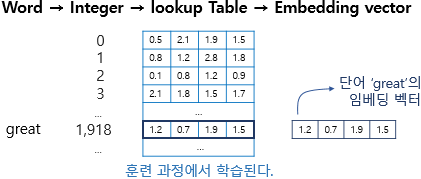)

- 위의 그림에서는 임베딩 벡터의 차원이 4로 설정
- **단어 great은 정수 인코딩 과정에서 1,918의 정수로 인코딩이 되었고, 그에 따라 단어 집합의 크기만큼의 행을 가지는 테이블에서 인덱스 1,918번에 위치한 행을 단어 great의 임베딩 벡터로 사용**
- 이 임베딩 벡터는 모델의 입력이 되고, 역전파 과정에서 단어 great의 임베딩 벡터값이 학습

<br>

- **케라스는 단어를 정수 인덱스로 바꾸고 원-핫 벡터로 변환 후 임베딩 층의 입력으로 사용하는 것이 아니라**

  **단어를 정수 인코딩까지만 진행 후 임베딩 층의 입력으로 사용**


In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

<br>

#### `tensorflow.keras.layers.Embedding(vocab_size, output_dim, input_length)`
- `vocab_size` = 텍스트 데이터의 전체 단어 집합의 크기
- `output_dim` = 워드 임베딩 후의 임베딩 벡터의 차원
- `input_length` = 입력 시퀀스의 길이
  - 만약 갖고있는 각 샘플의 길이가 500개이라면 이 값은 500

<br>

- `Embedding()`은 (number of samples, input_length)인 2D 정수 텐서를 입력받음
  - 이때 각 sample은 정수 인코딩이 된 결과로 정수 시퀀스
  - `Embedding()`은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimentionality)인 3D 실수 텐서를 리턴

In [10]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 
             'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합 :',vocab_size)

단어 집합 : 16


* 각 문장에 대해서 정수 인코딩을 수행

In [21]:
X_encoded = tokenizer.texts_to_sequences(sentences)
print('정수 인코딩 결과 :',X_encoded)

정수 인코딩 결과 : [[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


- 가장 길이가 긴 문장의 길이

In [22]:
max_len = max(len(l) for l in X_encoded)
print('최대 길이 :',max_len)

최대 길이 : 4


- 최대 길이로 모든 샘플에 대해서 패딩

In [23]:
X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)

패딩 결과 :
[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


<br>

#### 이진 분류 모델을 설계

In [18]:
embedding_dim = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [19]:
model.fit(X_train, y_train, epochs=100, verbose=False)

<br>

### 사전 훈련된 워드 임베딩(Pre-Trained Word Embedding)
- 데이터가 적은 상황이라면 케라스의 `Embedding()`으로 최적화 된 임베딩 벡터값을 얻는 것이 불가
- 이미 Word2Vec이나 GloVe 등으로 학습되어져 있는 임베딩 벡터들을 사용

<br>

GloVe 다운로드 링크 : http://nlp.stanford.edu/data/glove.6B.zip

Word2Vec 다운로드 링크 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM

<br>

#### 사전 훈련된 GloVe 사용하기

In [24]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

In [25]:
urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

- 총 40만개의 임베딩 벡터

In [26]:
embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    # 100개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


- 임의의 단어 `respectable`의 임베딩 벡터값과 크기를 출력

In [27]:
print(embedding_dict['respectable'])
print('벡터의 차원 수 :',len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

<br>

#### 단어 집합 크기의 행과 100개의 열을 가지는 영행렬 생성
- **이 행렬에 사전 훈련된 임베딩 값 입력**

In [31]:
embedding_matrix = np.zeros((vocab_size, 100))
print('임베딩 행렬의 크기(shape) :',np.shape(embedding_matrix))

임베딩 행렬의 크기(shape) : (16, 100)


<br>

- 기존 데이터의 각 단어와 맵핑된 정수값을 확인

In [32]:
print('단어 great의 맵핑된 정수 :',tokenizer.word_index['great'])

단어 great의 맵핑된 정수 : 2


- 사전 훈련된 GloVe에서 'great'의 벡터값 확인

In [33]:
print(embedding_dict['great'])

[-0.013786   0.38216    0.53236    0.15261   -0.29694   -0.20558
 -0.41846   -0.58437   -0.77355   -0.87866   -0.37858   -0.18516
 -0.128     -0.20584   -0.22925   -0.42599    0.3725     0.26077
 -1.0702     0.62916   -0.091469   0.70348   -0.4973    -0.77691
  0.66045    0.09465   -0.44893    0.018917   0.33146   -0.35022
 -0.35789    0.030313   0.22253   -0.23236   -0.19719   -0.0053125
 -0.25848    0.58081   -0.10705   -0.17845   -0.16206    0.087086
  0.63029   -0.76649    0.51619    0.14073    1.019     -0.43136
  0.46138   -0.43585   -0.47568    0.19226    0.36065    0.78987
  0.088945  -2.7814    -0.15366    0.01015    1.1798     0.15168
 -0.050112   1.2626    -0.77527    0.36031    0.95761   -0.11385
  0.28035   -0.02591    0.31246   -0.15424    0.3778    -0.13599
  0.2946    -0.31579    0.42943    0.086969   0.019169  -0.27242
 -0.31696    0.37327    0.61997    0.13889    0.17188    0.30363
 -1.2776     0.044423  -0.52736   -0.88536   -0.19428   -0.61947
 -0.10146   -0.26301  

<br>

- 단어 집합의 모든 단어에 대해서, 사전 훈련된 GloVe의 임베딩 벡터들을 맵핑한 후 'great'의 벡터값이 의도한 인덱스의 위치에 삽입되었는지 확인

In [34]:
for word, index in tokenizer.word_index.items():

    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = embedding_dict.get(word)
    
    if vector_value is not None:
        embedding_matrix[index] = vector_value

- embedding_matrix의 인덱스 2에서의 값 (great의 벡터값) 확인 

  $→$ **이전에 확인한 사전에 훈련된 GloVe에서의 'great'의 벡터값과 일치**

In [35]:
embedding_matrix[2]

array([-0.013786  ,  0.38216001,  0.53236002,  0.15261   , -0.29694   ,
       -0.20558   , -0.41846001, -0.58437002, -0.77354997, -0.87866002,
       -0.37858   , -0.18516   , -0.12800001, -0.20584001, -0.22925   ,
       -0.42598999,  0.3725    ,  0.26076999, -1.07019997,  0.62915999,
       -0.091469  ,  0.70348001, -0.4973    , -0.77691001,  0.66044998,
        0.09465   , -0.44893   ,  0.018917  ,  0.33146   , -0.35021999,
       -0.35789001,  0.030313  ,  0.22253001, -0.23236001, -0.19719   ,
       -0.0053125 , -0.25848001,  0.58081001, -0.10705   , -0.17845   ,
       -0.16205999,  0.087086  ,  0.63028997, -0.76648998,  0.51618999,
        0.14072999,  1.01900005, -0.43136001,  0.46138   , -0.43584999,
       -0.47567999,  0.19226   ,  0.36065   ,  0.78987002,  0.088945  ,
       -2.78139997, -0.15366   ,  0.01015   ,  1.17980003,  0.15167999,
       -0.050112  ,  1.26259995, -0.77526999,  0.36030999,  0.95761001,
       -0.11385   ,  0.28035   , -0.02591   ,  0.31246001, -0.15

<br>

#### 모델 학습

- 현재 실습에서 사전 훈련된 워드 임베딩을 100차원의 값인 것으로 사용하고 있기 때문에 임베딩 층의 output_dim의 인자값으로 100


In [36]:
output_dim = 100

- Embedding layer에 embedding_matrix를 초기값으로 설정
- **사전 훈련된 워드 임베딩을 그대로 사용할 경우 추가 훈련을 하지 않는다는 의미에서 `trainable의` 인자값을 False로 선택**

  ```python
  Embedding(vocab_size, output_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)
  ```

In [37]:
model = Sequential()
e = Embedding(vocab_size, output_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [38]:
model.fit(X_train, y_train, epochs=100, verbose=False)

<br>

### 사전 훈련된 Word2Vec 사용

링크 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g

<br>

- 300의 차원을 가진 Word2Vec 벡터가 3,000,000개 존재

In [39]:
import gensim

In [ ]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
print(word2vec_model.vectors.shape)

(3000000, 300)


<br>

#### 단어 집합 크기의 행과 300개의 열을 가지는 영행렬 생성
- 이 행렬에 사전 훈련된 임베딩 값 입력

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
print('임베딩 행렬의 크기(shape) :',np.shape(embedding_matrix))

<br>

- 모델에 특정 단어의 임베딩 벡터가 없다면 None을 리턴하도록 하는 함수

In [41]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

<br>

- 단어 집합으로부터 단어를 1개씩 호출하여 모델에 해당 단어의 임베딩 벡터값이 존재하는지 확인
- 만약 None이 아니라면 존재한다는 의미 $→$ 임베딩 행렬에 해당 단어의 인덱스 위치의 행에 임베딩 벡터의 값을 저장

In [ ]:
for word, index in tokenizer.word_index.items():

    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = get_vector(word)
    
    if vector_value is not None:
        embedding_matrix[index] = vector_value

- embedding_matrix의 인덱스 2에서의 값 (nice 벡터값) 확인 

  $→$ **이전에 확인한 사전에 훈련된 GloVe에서의 'nice'의 벡터값과 일치**

In [ ]:
print(word2vec_model['nice'])

[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [ ]:
print(embedding_matrix[2])

[ 7.17773438e-02  2.08007812e-01 -2.84423828e-02  1.78710938e-01
  1.32812500e-01 -9.96093750e-02  9.61914062e-02 -1.16699219e-01
 -8.54492188e-03  1.48437500e-01 -3.34472656e-02 -1.85546875e-01
  4.10156250e-02 -8.98437500e-02  2.17285156e-02  6.93359375e-02
  1.80664062e-01  2.22656250e-01 -1.00585938e-01 -6.93359375e-02
  1.04427338e-04  1.60156250e-01  4.07714844e-02  7.37304688e-02
  1.53320312e-01  6.78710938e-02 -1.03027344e-01  4.17480469e-02
  4.27246094e-02 -1.10351562e-01 -6.68945312e-02  4.19921875e-02
  2.50000000e-01  2.12890625e-01  1.59179688e-01  1.44653320e-02
 -4.88281250e-02  1.39770508e-02  3.55529785e-03  2.09960938e-01
  1.52343750e-01 -7.32421875e-02  2.16796875e-01 -5.76171875e-02
 -2.84423828e-02 -3.60107422e-03  1.52343750e-01 -2.63671875e-02
  2.13623047e-02 -1.51367188e-01  1.04003906e-01  3.18359375e-01
 -1.85546875e-01  3.68652344e-02 -1.10839844e-01 -3.17382812e-02
 -1.01562500e-01 -1.21093750e-01  3.22265625e-01 -7.32421875e-02
 -1.52343750e-01  2.67578

<br>

#### 모델 학습

In [ ]:
model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=False)